# Analyze sentiment in news articles

Important documentation:
- [Python client for news API](https://newsapi.org/docs/client-libraries/python)
- [Sources endpoint](https://newsapi.org/docs/endpoints/sources)
- [Articlese endpoint](https://newsapi.org/docs/endpoints/everything)

## Imports and notebook configuration

In [2]:
# basic configuration, put these lines at the top of each notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
from json import dump

import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from textblob import TextBlob
from textblob_de import TextBlobDE

In [4]:
plt.rcParams["figure.figsize"] = (16, 9)
pd.options.display.max_columns = None
pd.set_option('mode.chained_assignment', None)
pd.set_option("display.precision", 2)
pd.options.display.max_rows = 100

## Setup API connection

In [5]:
load_dotenv()

True

In [6]:
NEWS_API_KEY = os.getenv("NEWS_API_KEY")

In [7]:
api = NewsApiClient(api_key=NEWS_API_KEY)

## Get data sources

In [8]:
us_sources = api.get_sources(country='us', language='en')

In [9]:
print(len(us_sources['sources']))
us_sources

55


{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'description': 'News, analysis from the Middle East and worldwide, multimedia and interactives, opinions, documentaries, podcasts, long reads and broadcast schedule.',
   'url': 'http://www.aljazeera.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'ars-technica',
   'name': 'Ars Technica',
   'description': "The PC enthusiast's resource. Power users and the tools they love, without computing religion.",
   'url': 'http://arstechnica.com',
   'category': 'technology',
   'language': 'en',
   'country': 'us'},
  {'id': 'associated-press',
   'name': 'Associated Press',
   'description': 

In [10]:
de_sources = api.get_sources(country='de', language='de')

In [11]:
print(len(de_sources['sources']))
de_sources

10


{'status': 'ok',
 'sources': [{'id': 'bild',
   'name': 'Bild',
   'description': 'Die Seite 1 für aktuelle Nachrichten und Themen, Bilder und Videos aus den Bereichen News, Wirtschaft, Politik, Show, Sport, und Promis.',
   'url': 'http://www.bild.de',
   'category': 'general',
   'language': 'de',
   'country': 'de'},
  {'id': 'der-tagesspiegel',
   'name': 'Der Tagesspiegel',
   'description': 'Nachrichten, News und neueste Meldungen aus dem Inland und dem Ausland - aktuell präsentiert von tagesspiegel.de.',
   'url': 'http://www.tagesspiegel.de',
   'category': 'general',
   'language': 'de',
   'country': 'de'},
  {'id': 'die-zeit',
   'name': 'Die Zeit',
   'description': 'Aktuelle Nachrichten, Kommentare, Analysen und Hintergrundberichte aus Politik, Wirtschaft, Gesellschaft, Wissen, Kultur und Sport lesen Sie auf ZEIT ONLINE.',
   'url': 'http://www.zeit.de/index',
   'category': 'business',
   'language': 'de',
   'country': 'de'},
  {'id': 'focus',
   'name': 'Focus',
   'des

In [12]:
with open('../data/news-sentiment/us_sources.json', 'w') as f:
    dump(us_sources, f, indent=2)

In [13]:
with open('../data/news-sentiment/de_sources.json', 'w') as f:
    dump(de_sources, f, indent=2)

## Get news articles

In [14]:
us_source_ids = ','.join([s['id'] for s in us_sources['sources']])
us_source_ids

'abc-news,al-jazeera-english,ars-technica,associated-press,axios,bleacher-report,bloomberg,breitbart-news,business-insider,buzzfeed,cbs-news,cnn,crypto-coins-news,engadget,entertainment-weekly,espn,espn-cric-info,fortune,fox-news,fox-sports,google-news,hacker-news,ign,mashable,medical-news-today,msnbc,mtv-news,national-geographic,national-review,nbc-news,new-scientist,newsweek,new-york-magazine,next-big-future,nfl-news,nhl-news,politico,polygon,recode,reddit-r-all,reuters,techcrunch,techradar,the-american-conservative,the-hill,the-huffington-post,the-next-web,the-verge,the-wall-street-journal,the-washington-post,the-washington-times,time,usa-today,vice-news,wired'

In [15]:
us_news = api.get_everything(q='artificial intelligence', sources=us_source_ids, page_size=100)

In [16]:
us_news

{'status': 'ok',
 'totalResults': 565,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Ron Miller',
   'title': 'Salesforce beefing up field service offering with AI',
   'description': 'Salesforce has been adding artificial intelligence to all parts of its platform for several years now. It calls the underlying artificial intelligence layer on the Salesforce platform Einstein. Today the company announced some enhancements to its field servic…',
   'url': 'http://techcrunch.com/2020/09/01/salesforce-beefing-up-field-service-offering-with-ai/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/09/GettyImages-1135334309.jpg?w=480',
   'publishedAt': '2020-09-01T12:06:26Z',
   'content': 'Salesforce has been adding artificial intelligence to all parts of its platform for several years now. It calls the underlying artificial intelligence layer on the Salesforce platform Einstein. Today… [+3538 chars]'},
  {'source': {'id': 'techcrunch', 'na

In [17]:
len(us_news['articles'])

100

In [18]:
de_source_ids = ','.join([s['id'] for s in de_sources['sources']])
de_source_ids

'bild,der-tagesspiegel,die-zeit,focus,gruenderszene,handelsblatt,spiegel-online,t3n,wired-de,wirtschafts-woche'

In [19]:
de_news = api.get_everything(q='künstliche intelligenz', sources=de_source_ids, page_size=100)

In [20]:
len(de_news['articles'])

100

In [21]:
de_news

{'status': 'ok',
 'totalResults': 171,
 'articles': [{'source': {'id': 'spiegel-online', 'name': 'Spiegel Online'},
   'author': 'Jörg Breithut',
   'title': 'Gainsborough, Großbritannien: Polizei will Gesichtsausdrücke von Passanten auswerten',
   'description': 'In einer englischen Grafschaft steigt die Kriminalität. Nun sollen Kameras und künstliche Intelligenz eingesetzt werden, um das Verhalten von Passanten zu analysieren. Datenschützer sind empört.',
   'url': 'https://www.spiegel.de/netzwelt/gainsborough-grossbritannien-polizei-will-gesichtsausdruecke-von-passanten-auswerten-a-6808082a-ca9e-4f86-a54f-913706e60117',
   'urlToImage': 'https://cdn.prod.www.spiegel.de/images/c3787370-38f3-4a19-9850-3b4f21a2aec2_w1280_r1.77_fpx54.38_fpy55.01.jpg',
   'publishedAt': '2020-09-04T17:57:46Z',
   'content': None},
  {'source': {'id': 'spiegel-online', 'name': 'Spiegel Online'},
   'author': 'Sonja Peteranderl',
   'title': 'Künstliche Intelligenz als Krisenhelfer: Software, die Fluchtbew

In [22]:
with open('../data/news-sentiment/us_articles.json', 'w') as f:
    dump(us_news, f, indent=2)

In [23]:
with open('../data/news-sentiment/de_articles.json', 'w') as f:
    dump(de_news, f, indent=2)

## Extract sentiment

In [36]:
def results2df(results, lang='en'):
    articles = results['articles']
    data = [{
        'source': a['source']['id'],
        'title': a['title'],
        'desc': a['description'],
        'date': a['publishedAt'],
        'lang': lang,
        'title_sent': (TextBlob(a['title']).sentiment.polarity if lang == 'en' else TextBlobDE(a['title']).sentiment.polarity),
        'desc_sent': (TextBlob(a['description']).sentiment.polarity if lang == 'en' else TextBlobDE(a['description']).sentiment.polarity),
    } for a in articles]
    df = pd.DataFrame(data=data)
    return df

In [37]:
df = pd.concat([results2df(us_news, lang='en'), results2df(de_news, lang='de')], ignore_index=True)
df

,source,title,desc,date,lang,title_sent,desc_sent
0,techcrunch,Salesforce beefing up field service offering w...,Salesforce has been adding artificial intellig...,2020-09-01T12:06:26Z,en,0.0,-0.40
1,techcrunch,MIT wireless system can monitor what care faci...,Researchers at MIT’s Computer Science and Arti...,2020-08-25T04:00:07Z,en,0.0,0.02
2,techcrunch,"Deep Science: Dog detectors, Mars mappers and ...",Research papers come out at far too rapid a ra...,2020-09-02T17:28:36Z,en,0.0,0.20
3,techcrunch,"iKala, an AI-based customer engagement platfor...","iKala, a Taiwanese startup that offers an arti...",2020-08-19T09:21:56Z,en,0.0,-0.09
4,techcrunch,Workplace management startup Legion raises $22...,"Legion, an artificial intelligence driven plat...",2020-09-02T13:00:53Z,en,0.0,-0.10
...,...,...,...,...,...,...,...
195,handelsblatt,Autonomes Fahren: Verkehr der Zukunft: Mobilit...,Beim Autogipfel im Kanzleramt geht es nicht nu...,2020-09-07T10:33:14Z,de,0.7,0.23
196,handelsblatt,Kurswechsel bei den Handelsbeziehungen: Bundes...,Berlin will die ökonomische Abhängigkeit von d...,2020-09-02T03:00:00Z,de,0.0,-0.35
197,focus,"Selfmade-Unternehmer statt Erben - Bezos, Gate...",Wie werden die meisten Reichen reich – durch A...,2020-08-14T11:07:03Z,de,0.0,0.70
198,handelsblatt,Julia Bösch: Outfittery will mit KI noch mehr ...,Die Corona-Pandemie treibt die Wende zum Onlin...,2020-09-02T04:13:44Z,de,0.0,0.00


## Examine sentiment

<AxesSubplot:ylabel='Frequency'>

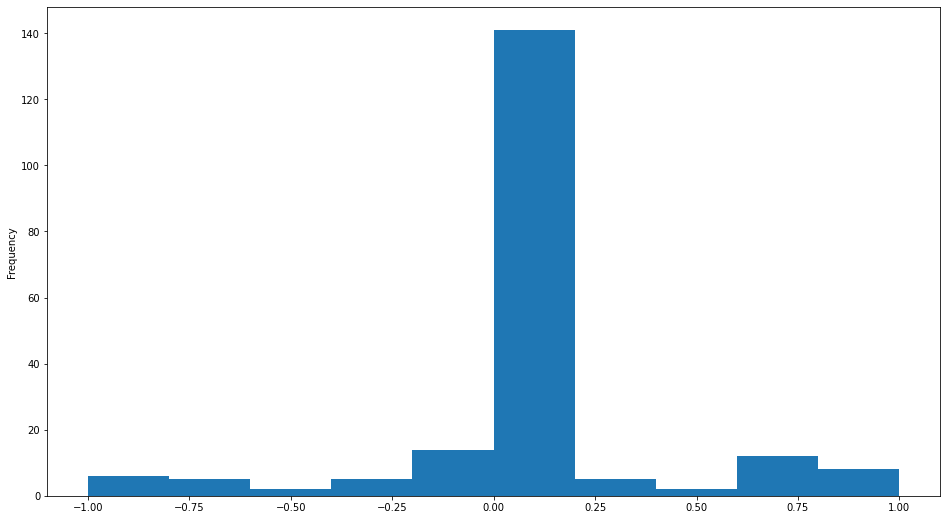

In [41]:
df.title_sent.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

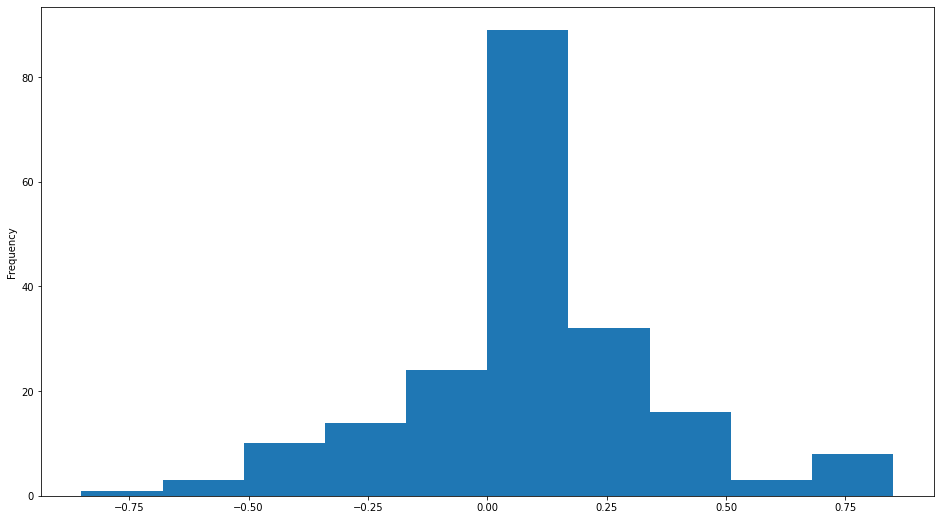

In [42]:
df.desc_sent.plot(kind='hist')

In [47]:
df[['desc_sent', 'title_sent']].corr(method='kendall')

,desc_sent,title_sent
desc_sent,1.0,0.1
title_sent,0.1,1.0


<AxesSubplot:xlabel='lang'>

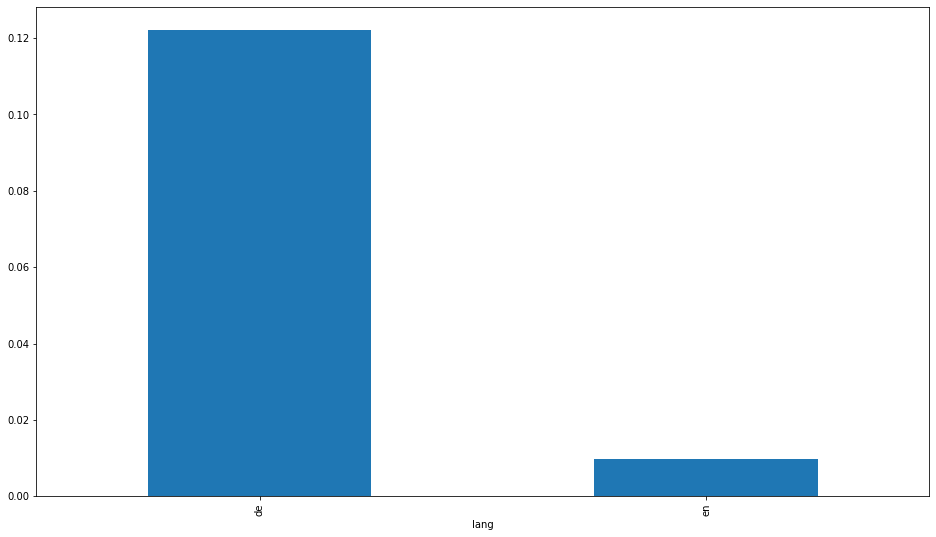

In [51]:
df.groupby('lang')['desc_sent'].mean().plot(kind='bar')

<AxesSubplot:xlabel='lang,source'>

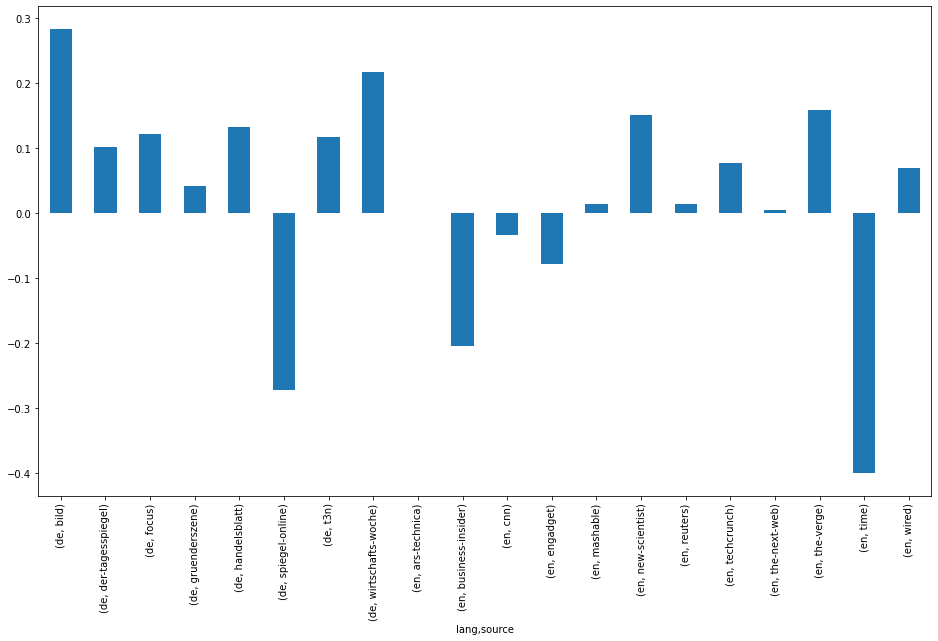

In [55]:
df.groupby(['lang', 'source'])['desc_sent'].mean().plot(kind='bar')